## Estimate the Probability of Graduate School Admission

#### We will start by downloading our dataset. The dataset consists of information of 500 students applying to different universities. The information has the following 9 features: 

    Serial number (to be ignored).
    GRE score: an integer number between 290 and 340.
    TOEFL score: an integer number between 92 and 120.
    University rating: values in the range from 1 to 5.
    Letter of Recommendation (LOR) score: values in the range from 1 to 5 with a step of 0.5.
    Statement of Purpose (SOP) score: values in the range from 1 to 5 with a step of 0.5.
    Undergraduate GPA: a floating-point number in the range from 6.3 to 9.92.
    Research Experience: 0/1 depending on whether the student has prior research experience.
    Chance of admittance: a floating-point number between 0 and 1.

Note the first 8 features represent the independent variables, while the last feature is the dependent variable. 


#### Select the Most Suitable Model
To select the most suitable model for the problem, you will need to answer the following questions:

    Is this a supervised or unsupervised learning problem?
    Is this a regression, classification, or clustering problem?
    Is the data linear or non-linear?
    Which regression/classification/clustering model is most suitable?

Hint: if more than one model can be used to learn from the available data, you can build and train all selected models, then compare the accuracy to decide the best model. 


#### Prepare the Dataset
To prepare the data for machine learning, you should perform the following operations:

    Load the data from the CSV file.
    Drop the first column and split the columns into input and output.
    Split the data into training and test sets.
    Scale input features using a standard scaler.

#### Build and Train the Selected Models

    For each of the selected models:
        Use the scikit-learn library to build the model using default parameters.
        Use the training set to train the model.
        
#### Evaluate and Compare the Models

    For each of the models:
        Evaluate the model using the test set.
        Calculate the accuracy score of the model.
    Compare the scores of the different models.
        The model that gives the best score may be the most suitable one for the problem.

#### Re-Evaluate the Models Using Different Parameters

    Change the parameters of the models.
    Retrain the model.

Is your best model from step 5 still the same? 

In [1]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from livelossplot import PlotLossesKeras

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, mean_squared_error


In [3]:
scaler = StandardScaler()
model = LinearRegression()
modelANNKeras = Sequential()

In [4]:
#Load the dataset
dataset = pd.read_csv('Admission_Predict.csv')
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
dataset = dataset.drop(["Serial No."], axis = 1)
dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


### So based on the description I believe that this is supervised, and we will want to do regression as we are looking for essentially a percentage between 0-1 with our label being "Chance of Admit". I also feel this is linear and that as our target is a floating point between 0 and 1 our best activation choice would probably be sigmoid (though softmax could also work)

Based on the size of our data, 400 rows with 8 columns this would not need a very large network I feel also, though I will check a few different layer parameters to find my best model. Also on thinking of our data and what we are trying to solve, I believe I will use Scikit rather than keras as it is both a smaller dataset and not too complex, everything we are trying to solve I believe can be done with MLPRegression

Before I begin I will do some data analysis to check if there's any issues within the data that I can spot.

In [6]:
# check for NaN values - none found
nan_count = dataset.isna().sum()

print(nan_count)

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [7]:
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

Next we will do some visualization

<AxesSubplot:>

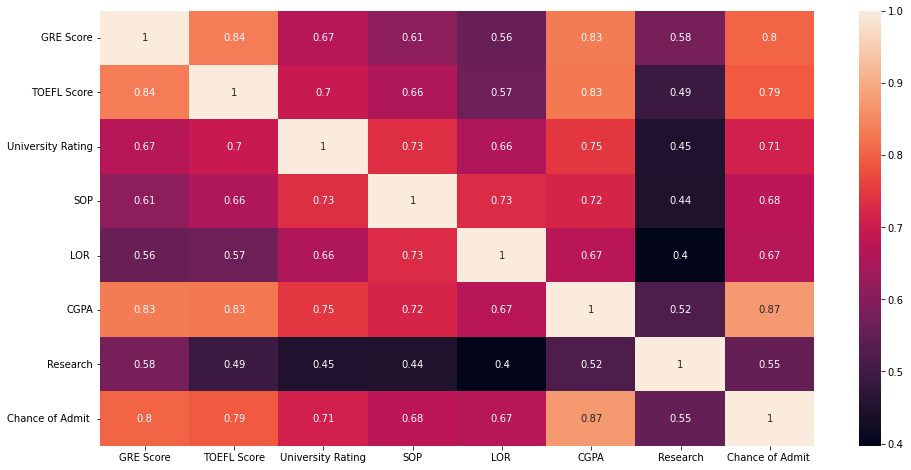

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(dataset.corr(),annot=True)

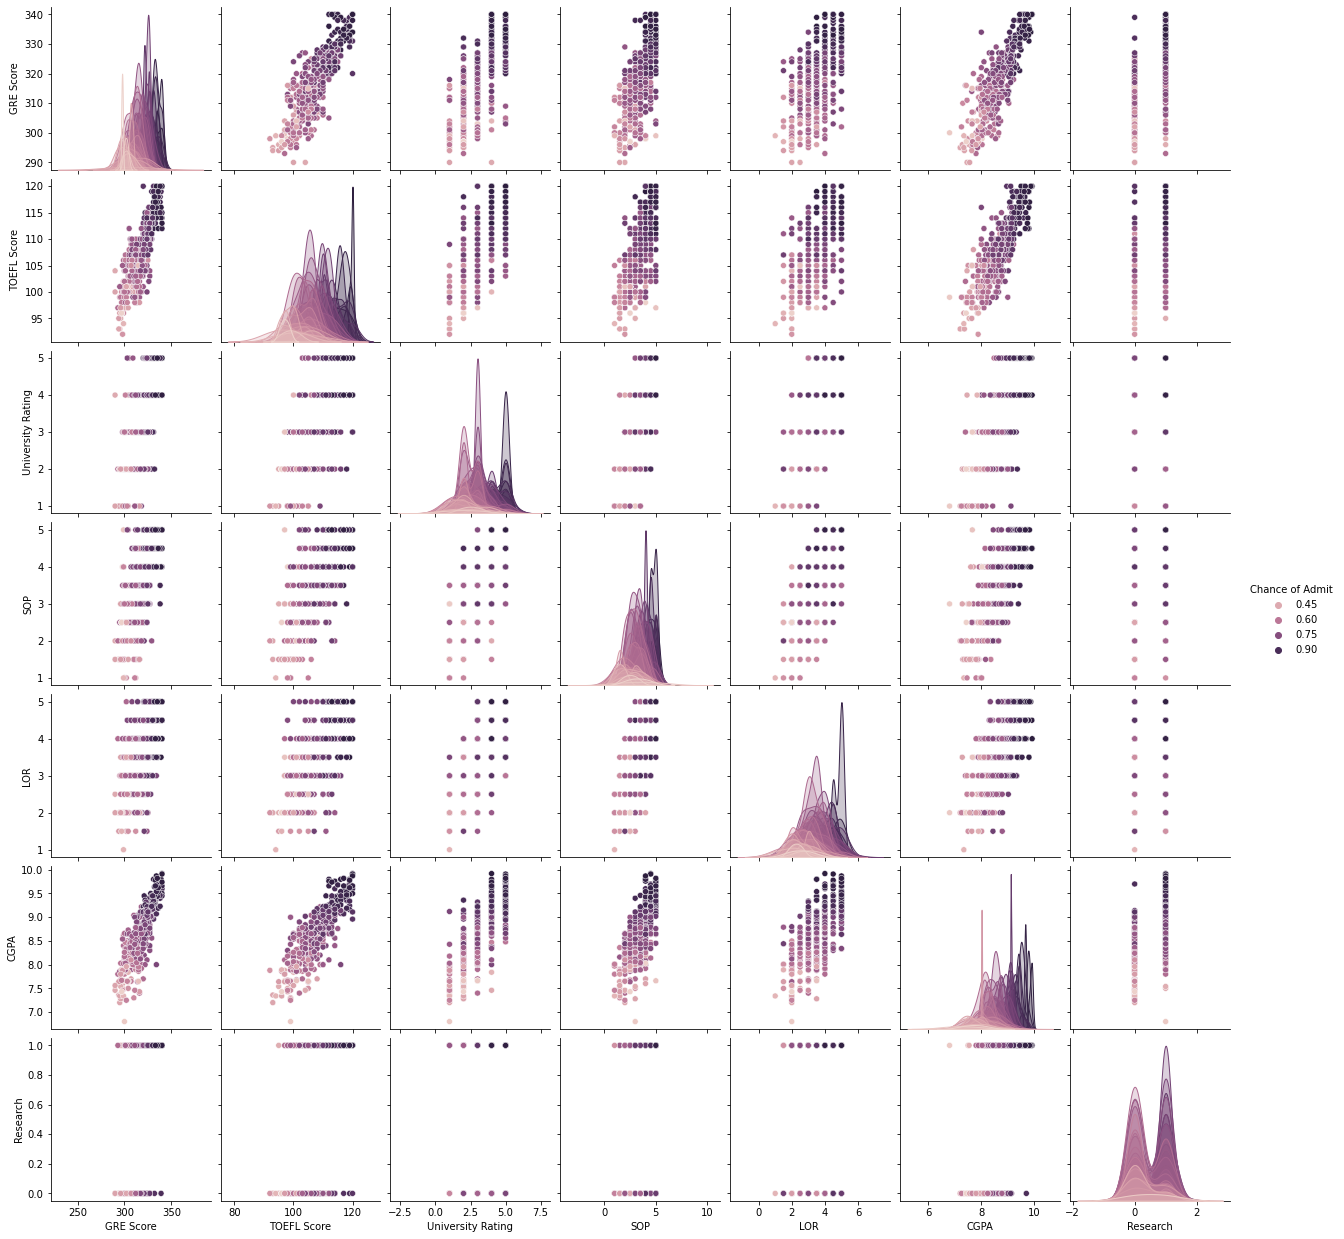

In [9]:
#Now that that's ready let's start with a pair plot
sns.pairplot(dataset, hue = "Chance of Admit ", vars =['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'])
plt.show()

Based on the Pairplot it looks like there could certainly be a correlation between CGPA and TOEFL  with the Chance to admit.

In [10]:
# and then train/test/split
encoded_y = dataset.iloc[:, :8].values
encoded_x = dataset.iloc[:, 0:7].values

# as this is a very small dataset we will use 90% for training and  5% for each testing and validation
# train is now 90% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(encoded_x, encoded_y, test_size=0.1)

print(len(X_train), len(X_test))
# test is now 10% of the initial data set
# validation is now 10% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.5) 
print(len(X_train), len(X_val), len(X_test))

360 40
360 20 20


In [11]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

For activation we will use logistic (which is sigmoid) for both hidden output layer, and based on documentation, while solver "adam" is good for larger networks, it's recommended that for smaller networks one should use "lbfgs" instead for better performance and faster convergence so I will use that.

In [12]:
# Design the Network:

modelANNSKL = MLPRegressor(hidden_layer_sizes =(10,100),
                     activation = 'logistic', 
                     solver = 'lbfgs', 
                     batch_size = 10,
                     max_iter = 100000,
                     random_state = 0,
                     verbose = True)

In [13]:
modelANNSKL.fit(X_train, y_train)

MLPRegressor(activation='logistic', batch_size=10, hidden_layer_sizes=(10, 100),
             max_iter=100000, random_state=0, solver='lbfgs', verbose=True)

In [14]:
scoreANNSKL = modelANNSKL.score(X_test, y_test)
print(scoreANNSKL)

0.9626973017359579


This model scores well at approx 96-98%